# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
previsao_renda = pd.read_csv("Profissao- Cientista de Dados_M10_support material.csv")
previsao_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [10]:
previsao_renda.info() 
#pelo exemplo da aula 3, o tipo da variável 'data_ref' era datetime64, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [48]:
previsao_renda.loc[:,'data_ref'] = pd.to_datetime(previsao_renda['data_ref'])
previsao_renda.info()
#logo, para conseguir replicar o método de análise, converti a variável para este tipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15000 non-null  int64         
 1   data_ref               15000 non-null  datetime64[ns]
 2   index                  15000 non-null  int64         
 3   sexo                   15000 non-null  object        
 4   posse_de_veiculo       15000 non-null  bool          
 5   posse_de_imovel        15000 non-null  bool          
 6   qtd_filhos             15000 non-null  int64         
 7   tipo_renda             15000 non-null  object        
 8   educacao               15000 non-null  object        
 9   estado_civil           15000 non-null  object        
 10  tipo_residencia        15000 non-null  object        
 11  idade                  15000 non-null  int64         
 12  tempo_emprego          12466 non-null  float64       
 13  q

C:\Users\khrik\AppData\Local\Temp\ipykernel_18652\1080403878.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  previsao_renda.loc[:,'data_ref'] = pd.to_datetime(previsao_renda['data_ref'])


In [14]:
previsao_renda['data_ref'].nunique()

#identificando as datas e a quantidade

15

In [15]:
previsao_renda['data_ref'].value_counts()

2015-01-01    1000
2015-02-01    1000
2015-03-01    1000
2015-04-01    1000
2015-05-01    1000
2015-06-01    1000
2015-07-01    1000
2015-08-01    1000
2015-09-01    1000
2015-10-01    1000
2015-11-01    1000
2015-12-01    1000
2016-01-01    1000
2016-02-01    1000
2016-03-01    1000
Name: data_ref, dtype: int64

In [17]:
previsao_renda.select_dtypes(exclude=['int64','float64']).head() 

#identificando somente as variáveis object

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa,False
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa,False
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa,False
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa,False
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa,False


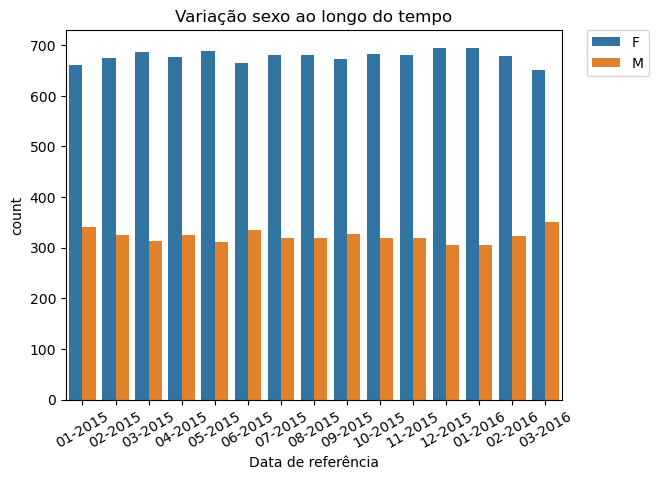

In [30]:
#variávell sexo

ax = sns.countplot(x='data_ref', hue = 'sexo', data=previsao_renda)

tick_labs = previsao_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=30)
ax.set_xlabel('Data de referência')
ax.set_title('Variação sexo ao longo do tempo')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

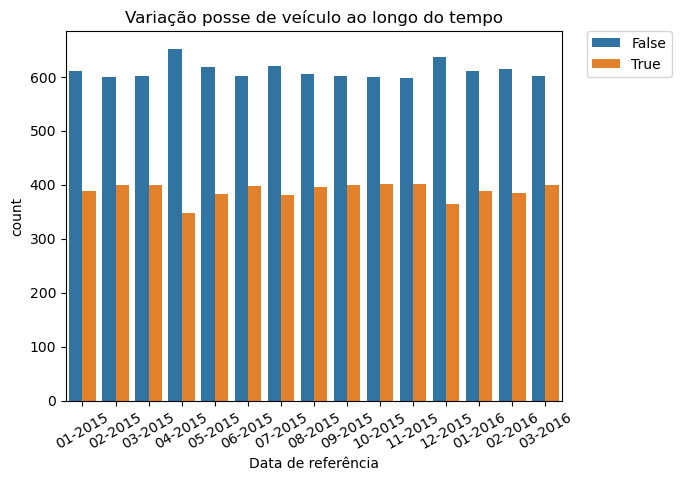

In [31]:
#posse de veículo

ax = sns.countplot(x='data_ref', hue = 'posse_de_veiculo', data=previsao_renda)

tick_labs = previsao_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=30)
ax.set_xlabel('Data de referência')
ax.set_title('Variação posse de veículo ao longo do tempo')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

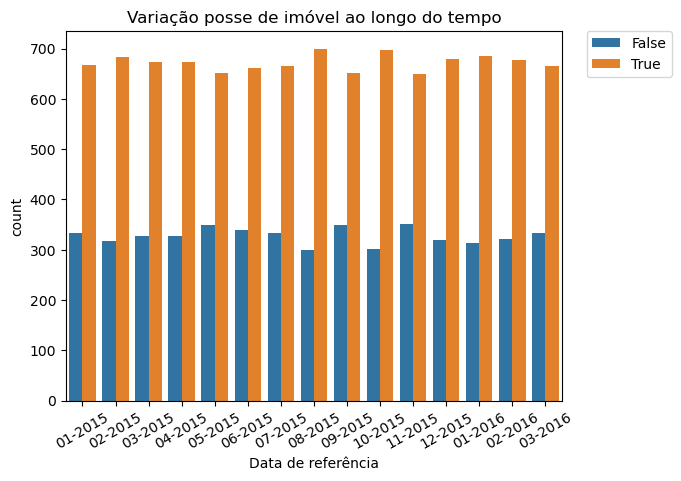

In [34]:
#posse de imovel

ax = sns.countplot(x='data_ref', hue = 'posse_de_imovel', data=previsao_renda)

tick_labs = previsao_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=30)
ax.set_xlabel('Data de referência')
ax.set_title('Variação posse de imóvel ao longo do tempo')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

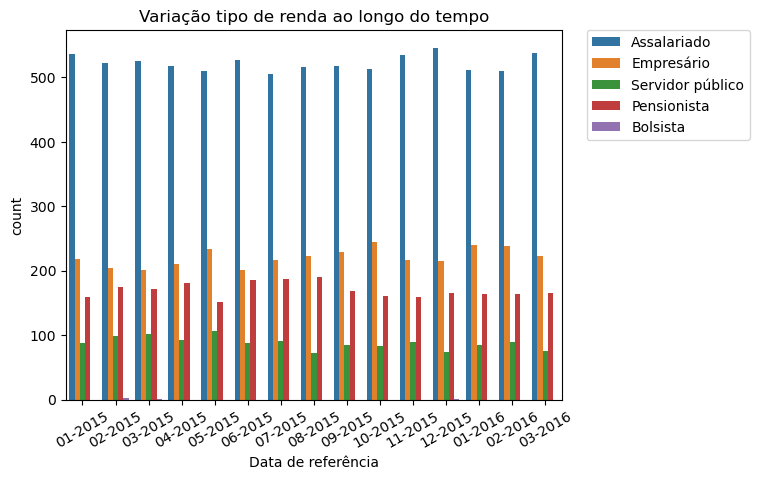

In [102]:
# tipo de renda

ax = sns.countplot(x='data_ref', hue = 'tipo_renda', data=previsao_renda)

tick_labs = previsao_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=30)
ax.set_xlabel('Data de referência')
ax.set_title('Variação tipo de renda ao longo do tempo')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

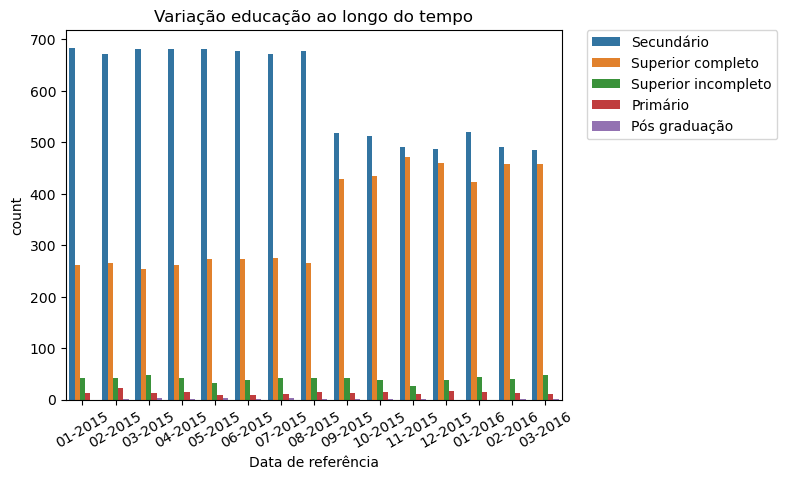

In [36]:
#educação

ax = sns.countplot(x='data_ref', hue = 'educacao', data=previsao_renda)

tick_labs = previsao_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=30)
ax.set_xlabel('Data de referência')
ax.set_title('Variação educação ao longo do tempo')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

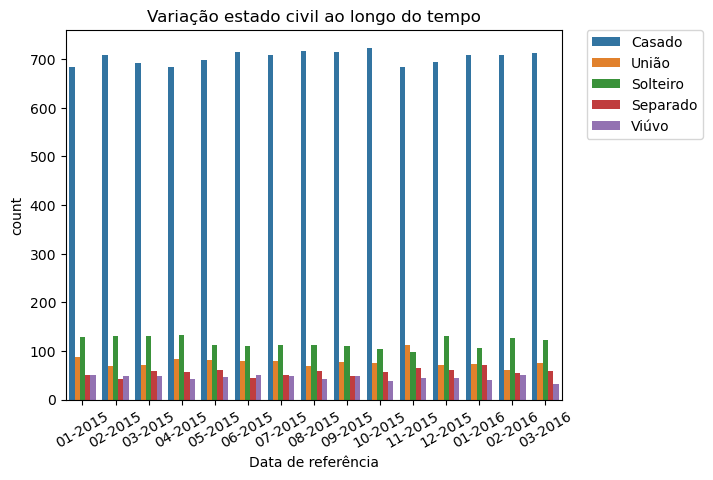

In [38]:
#estado civil

ax = sns.countplot(x='data_ref', hue = 'estado_civil', data=previsao_renda)

tick_labs = previsao_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=30)
ax.set_xlabel('Data de referência')
ax.set_title('Variação estado civil ao longo do tempo')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

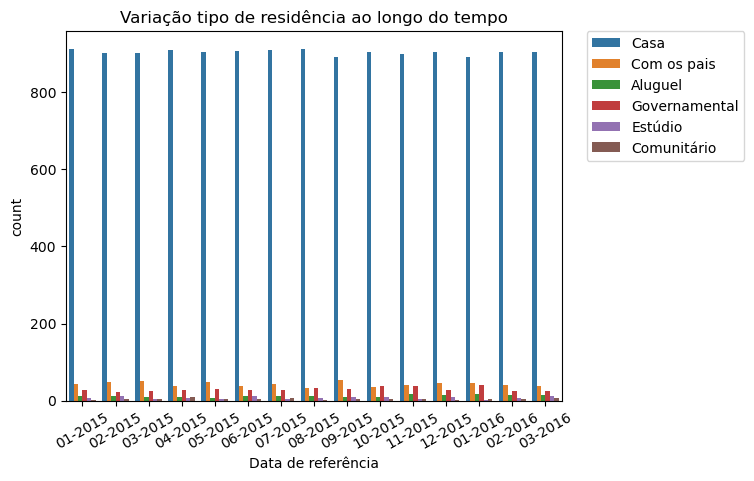

In [39]:
#tipo de residencia

ax = sns.countplot(x='data_ref', hue = 'tipo_residencia', data=previsao_renda)

tick_labs = previsao_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=30)
ax.set_xlabel('Data de referência')
ax.set_title('Variação tipo de residência ao longo do tempo')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

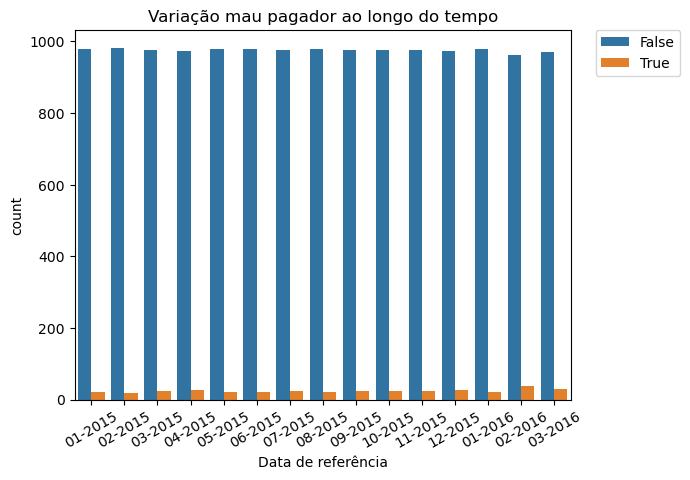

In [41]:
#mau pagador

ax = sns.countplot(x='data_ref', hue = 'mau', data=previsao_renda)

tick_labs = previsao_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=30)
ax.set_xlabel('Data de referência')
ax.set_title('Variação mau pagador ao longo do tempo')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Insights

- Após avaliar todas as variáveis qualitativas, apenas a variável educação chama a atenção pela sua variação ao longo do tempo.

## 2)
Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [93]:
previsao_renda.select_dtypes(exclude=['int64','float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_ref          15000 non-null  datetime64[ns]
 1   sexo              15000 non-null  object        
 2   posse_de_veiculo  15000 non-null  bool          
 3   posse_de_imovel   15000 non-null  bool          
 4   tipo_renda        15000 non-null  object        
 5   educacao          15000 non-null  object        
 6   estado_civil      15000 non-null  object        
 7   tipo_residencia   15000 non-null  object        
 8   mau               15000 non-null  bool          
dtypes: bool(3), datetime64[ns](1), object(5)
memory usage: 747.2+ KB


In [57]:
previsao_renda['data'] = pd.to_numeric(previsao_renda['data_ref'])
previsao_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,data
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24,1420070400000000000
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14,1420070400000000000
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98,1420070400000000000
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69,1420070400000000000
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37,1420070400000000000


In [60]:
previsao_renda.data.nunique()

15

C:\Users\khrik\AppData\Local\Temp\ipykernel_18652\422518712.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax2.set_xticklabels(tick_labs, rotation=30)


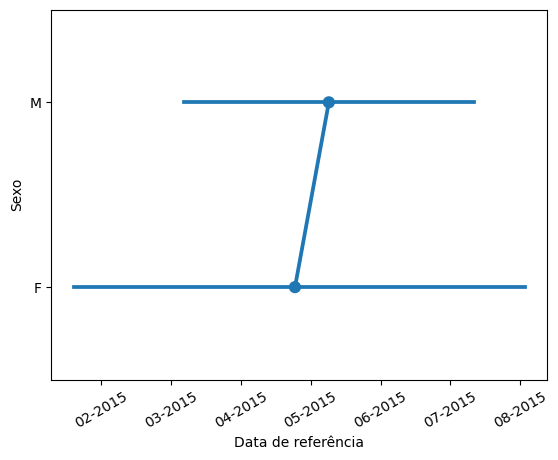

In [106]:
#sexo

ax2 = sns.pointplot(x="data", y = 'sexo',
                   data=previsao_renda, dodge=True)

#plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ax2.set_xlabel('Data de referência')
ax2.set_ylabel('Sexo')
ax2.set_yticklabels(['M', 'F'])

labels = ax2.set_xticklabels(tick_labs, rotation=30)

C:\Users\khrik\AppData\Local\Temp\ipykernel_18652\2902313384.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax2.set_xticklabels(tick_labs, rotation=30)


[Text(0, 0, 'Pós graduação'),
 Text(0, 1, 'Primário'),
 Text(0, 2, 'Superior incompleto'),
 Text(0, 3, 'Superior completo'),
 Text(0, 4, 'Secundário')]

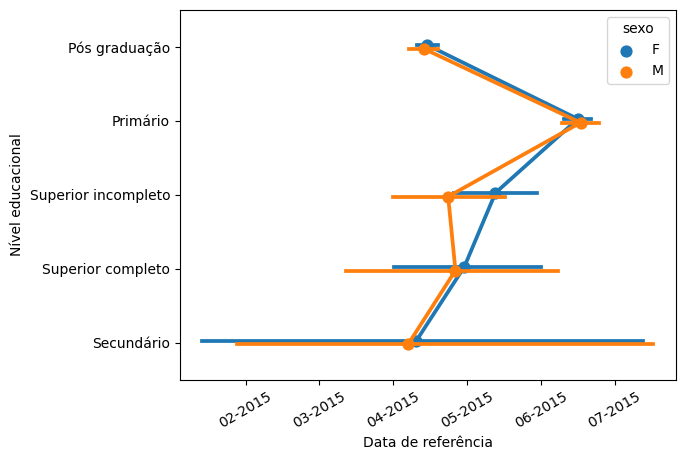

In [138]:
#educação

ax2 = sns.pointplot(x="data", y = 'educacao', hue = 'sexo',
                   data=previsao_renda, dodge=True)

#plt.legend(loc = 'lower center', bbox_to_anchor=(0.4, -.40),ncol = 3)

tick_labs = previsao_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

labels = ax2.set_xticklabels(tick_labs, rotation=30)

ylabel = ['Secundário','Superior completo','Superior incompleto','Primário','Pós graduação']

ax2.set_xlabel('Data de referência')
ax2.set_ylabel('Nível educacional')
ax2.set_yticklabels(ylabel[::-1])

Text(0, 0.5, 'Posse de veículo')

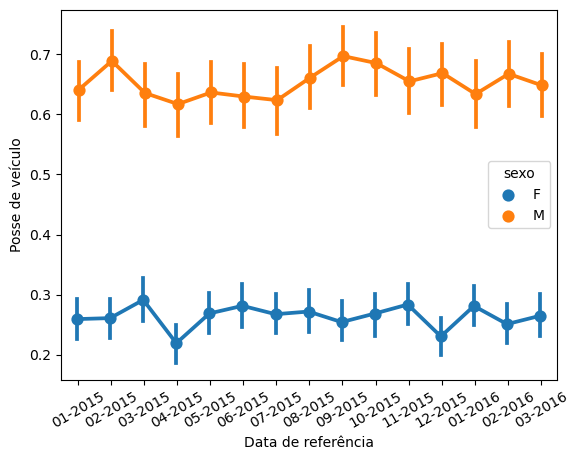

In [137]:
# posse de veículo

ax2 = sns.pointplot(x="data", y = 'posse_de_veiculo', hue = 'sexo',
                   data=previsao_renda, dodge=True)

#plt.legend(loc = 'lower center', bbox_to_anchor=(0.4, -.40),ncol = 3)

tick_labs = previsao_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

labels = ax2.set_xticklabels(tick_labs, rotation=30)

ax2.set_xlabel('Data de referência')
ax2.set_ylabel('Posse de veículo')

Text(0, 0.5, 'Posse de imóvel')

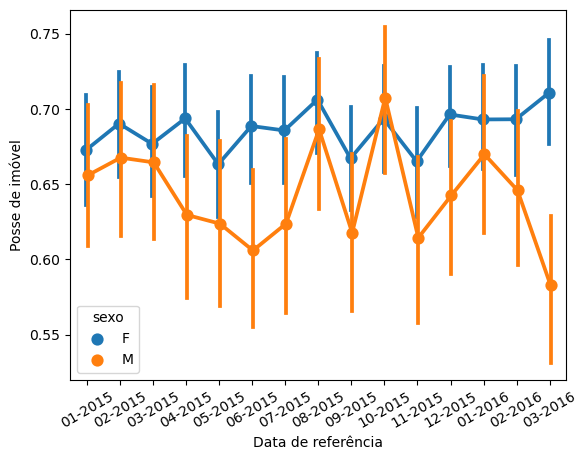

In [144]:
ax2 = sns.pointplot(x="data", y = 'posse_de_imovel', hue = 'sexo',
                   data=previsao_renda, dodge=True)

#plt.legend(loc = 'lower center', bbox_to_anchor=(0.4, -.40),ncol = 3)

tick_labs = previsao_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

labels = ax2.set_xticklabels(tick_labs, rotation=30)

ax2.set_xlabel('Data de referência')
ax2.set_ylabel('Posse de imóvel')

C:\Users\khrik\AppData\Local\Temp\ipykernel_18652\2837106116.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax2.set_xticklabels(tick_labs, rotation=30)


[Text(0, 0, 'Bolsista'),
 Text(0, 1, 'Pensionista'),
 Text(0, 2, 'Servidor público'),
 Text(0, 3, 'Empresário'),
 Text(0, 4, 'Assalariado')]

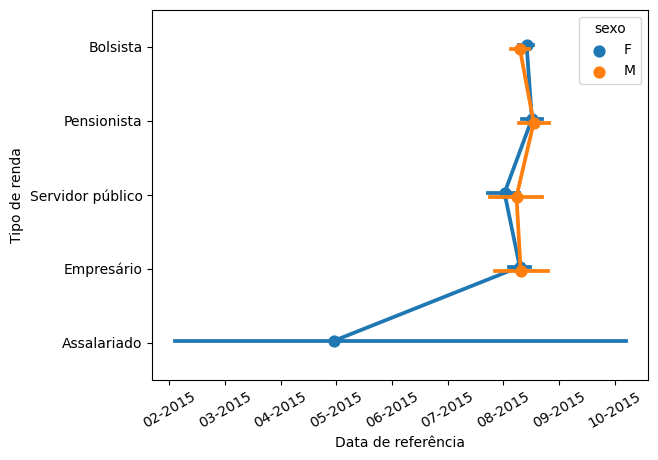

In [140]:
# tipo_renda

ax2 = sns.pointplot(x="data", y = 'tipo_renda', hue = 'sexo',
                   data=previsao_renda, dodge=True)

#plt.legend(loc = 'lower center', bbox_to_anchor=(0.4, -.40),ncol = 3)

tick_labs = previsao_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

labels = ax2.set_xticklabels(tick_labs, rotation=30)

ylabel = previsao_renda.tipo_renda.unique()

ax2.set_xlabel('Data de referência')
ax2.set_ylabel('Tipo de renda')
ax2.set_yticklabels(ylabel[::-1])

C:\Users\khrik\AppData\Local\Temp\ipykernel_18652\1625764418.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax2.set_xticklabels(tick_labs, rotation=30)


[Text(0, 0, 'Viúvo'),
 Text(0, 1, 'Separado'),
 Text(0, 2, 'Solteiro'),
 Text(0, 3, 'União'),
 Text(0, 4, 'Casado')]

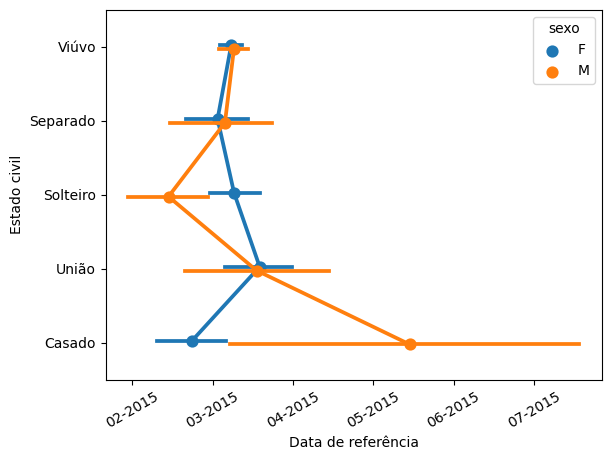

In [146]:
# estado_civil

ax2 = sns.pointplot(x="data", y = 'estado_civil', hue = 'sexo',
                   data=previsao_renda, dodge=True)

#plt.legend(loc = 'lower center', bbox_to_anchor=(0.4, -.40),ncol = 3)

tick_labs = previsao_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

labels = ax2.set_xticklabels(tick_labs, rotation=30)

ylabel = previsao_renda.estado_civil.unique()

ax2.set_xlabel('Data de referência')
ax2.set_ylabel('Estado civil')
ax2.set_yticklabels(ylabel[::-1])


C:\Users\khrik\AppData\Local\Temp\ipykernel_18652\2099770206.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax2.set_xticklabels(tick_labs, rotation=30)


[Text(0, 0, 'Comunitário'),
 Text(0, 1, 'Estúdio'),
 Text(0, 2, 'Governamental'),
 Text(0, 3, 'Aluguel'),
 Text(0, 4, 'Com os pais'),
 Text(0, 5, 'Casa')]

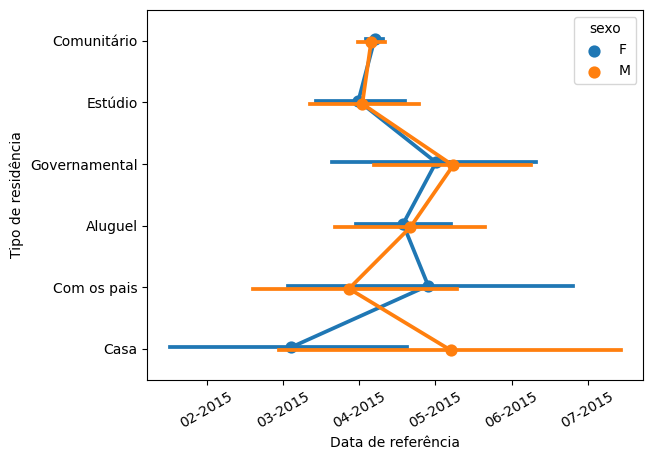

In [142]:
#tipo_residencia

ax2 = sns.pointplot(x="data", y = 'tipo_residencia', hue = 'sexo',
                   data=previsao_renda, dodge=True)

#plt.legend(loc = 'lower center', bbox_to_anchor=(0.4, -.40),ncol = 3)

tick_labs = previsao_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

labels = ax2.set_xticklabels(tick_labs, rotation=30)

ylabel = previsao_renda.tipo_residencia.unique()

ax2.set_xlabel('Data de referência')
ax2.set_ylabel('Tipo de residência')
ax2.set_yticklabels(ylabel[::-1])

## Insights

- Não consegui avaliar a estabilidade das variáveis: tipo_residencia, educacao, estado_civil e tipo_renda. Uma vez que não consegui compreender bem como analilsar os gráficos.
- As variáveis que posse de imóvel e posse de veículo apresentam estabilidades distintas. A posse de imóvel parece ter uma certa instabilidade sobre o tempo até mesmo quando separados por gênero, observando picos e vales, mas sobretudo, uma queda mais acentuada ao final da linha temporal.
- Talvez a variável posse de imóvel não seja adequada suficiente para o modelo.